In [1]:
import pandas as pd
import numpy as np
#!pip install requests
import requests
import json

from sklearn.cluster import KMeans
#!pip install seaborn
import seaborn as sns
#!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Parte I**

In [3]:
# # #API de CoinGecko Para ver status de Cryptos:
# #Crypto (Bitcoin & Ethereum)
# #Fecha, Divisa/Nombre, valor y fuente. (Si consideras que debería haber más campos, agrégalos)

#https://api.coingecko.com/api/v3/coins/
coing_url = 'https://api.coingecko.com/api/v3/coins/'

#coins = requests.get(coing_url, params=params)
coins = requests.get(coing_url)
coins

<Response [200]>

In [4]:
a = pd.json_normalize(coins.json())#.head()
dfcr = a.copy()
dfcr.head()

#bit = pd.pivot_table(bit,index=["name"],values=["last_updated", 'market_data.current_price.usd'])
# #Fecha, Divisa/Nombre, valor y fuente. (Si consideras que debería haber más campos, agrégalos)

id symbol      name block_time_in_minutes  \
0      bitcoin    btc   Bitcoin                  10.0   
1     ethereum    eth  Ethereum                   0.2   
2       tether   usdt    Tether                  None   
3     usd-coin   usdc  USD Coin                  None   
4  binancecoin    bnb       BNB                  None   

               last_updated  \
0  2022-07-02T04:39:15.688Z   
1  2022-07-02T04:39:16.179Z   
2  2022-07-02T04:36:07.021Z   
3  2022-07-02T04:40:17.823Z   
4  2022-07-02T04:39:39.003Z   

                                         image.thumb  \
0  https://assets.coingecko.com/coins/images/1/th...   
1  https://assets.coingecko.com/coins/images/279/...   
2  https://assets.coingecko.com/coins/images/325/...   
3  https://assets.coingecko.com/coins/images/6319...   
4  https://assets.coingecko.com/coins/images/825/...   

                                         image.small  \
0  https://assets.coingecko.com/coins/images/1/sm...   
1  https://assets.coingecko.com/coins/images/279/...   
2  https://assets.coingecko.com/coins/images/325/...   
3  https://assets.coingecko.com/coins/images/6319...   
4  https://assets.coingecko.com/coins/images/825/...   

                                         image.large  \
0  https://assets.coingecko.com/coins/images/1/la...   
1  https://assets.coingecko.com/coins/images/279/...   
2  https://assets.coingecko.com/coins/images/325/...   
3  https://assets.coingecko.com/coins/images/6319...   
4  https://assets.coingecko.com/coins/images/825/...   

   market_data.current_price.aed  market_data.current_price.ars  ...  \
0                       70583.00                     2411836.00  ...   
1                        3840.28                      131223.00  ...   
2                           3.67                         125.52  ...   
3                           3.68                         125.75  ...   
4                         794.06                       27133.00  ...   

   localization.uk  localization.he  localization.fi  localization.bg  \
0          Bitcoin          Bitcoin          Bitcoin          Bitcoin   
1         Ethereum         Ethereum         Ethereum         Ethereum   
2           Tether           Tether           Tether           Tether   
3         USD Coin         USD Coin         USD Coin         USD Coin   
4              BNB              BNB              BNB              BNB   

   localization.hr  localization.lt  localization.sl  market_data.roi.times  \
0          Bitcoin          Bitcoin          Bitcoin                    NaN   
1         Ethereum         Ethereum         Ethereum              71.754512   
2           Tether           Tether           Tether                    NaN   
3         USD Coin         USD Coin         USD Coin                    NaN   
4              BNB              BNB              BNB                    NaN   

   market_data.roi.currency  market_data.roi.percentage  
0                       NaN                         NaN  
1                       btc                 7175.451152  
2                       NaN                         NaN  
3                       NaN                         NaN  
4                       NaN                         NaN  

[5 rows x 1035 columns]

In [5]:
bit = dfcr
bit['Precio (dolar estadounidense)'] = bit['market_data.current_price.usd']
bit['Nombre'] = bit['name']
bit['Fecha y hora'] = bit['last_updated']

bit.drop(['market_data.current_price.usd', 'name', 'last_updated'],axis=1,inplace=True)

bit = pd.pivot_table(dfcr,index=["Nombre", "Fecha y hora"],values=['Precio (dolar estadounidense)'])
#Fuente: https://www.coingecko.com/es
# #Fecha, Divisa/Nombre, valor y fuente. (Si consideras que debería haber más campos, agrégalos)
bit = bit.query('Nombre == ["Bitcoin", "Ethereum", "Bitcoin Cash", "Bitcoin SV", "Ethereum Classic"]')
bit = bit.sort_values(by='Precio (dolar estadounidense)',ascending=False)[:]
bit

Precio (dolar estadounidense)
Nombre           Fecha y hora                                           
Bitcoin          2022-07-02T04:39:15.688Z                       19216.72
Ethereum         2022-07-02T04:39:16.179Z                        1045.54
Bitcoin Cash     2022-07-02T04:39:31.989Z                         101.52
Bitcoin SV       2022-07-02T04:39:59.053Z                          51.65
Ethereum Classic 2022-07-02T04:40:01.829Z                          14.54

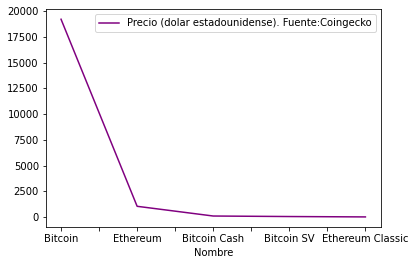

In [6]:
bit = bit.reset_index()
bit.plot(x='Nombre', y='Precio (dolar estadounidense)', stacked=True, color='purple', label='Precio (dolar estadounidense). Fuente:Coingecko')

# **Parte II**

In [7]:
#De google
r = requests.get('https://www.google.com/finance/?hl=enchrome-extension%3A%2F%2Fmhffmephdchhhbfjmdpoaldedhhdanbn%2FhomePage.html')
print(len(r.text))

858034


In [8]:
print(r.text)

<!doctype html><html lang="en" dir="ltr"><head><base href="https://www.google.com/finance/"><meta name="referrer" content="origin"><link rel="canonical" href="https://www.google.com/finance/"><meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=1,user-scalable=no,minimal-ui"><meta name="google-site-verification" content="sxp7zFOFUzk09RdlFhuH2SoCn5nOkXgomiLeLIQ48p0"><meta name="mobile-web-app-capable" content="yes"><meta name="apple-mobile-web-app-capable" content="yes"><meta name="application-name" content="Google Finance"><meta name="apple-mobile-web-app-title" content="Google Finance"><meta name="apple-mobile-web-app-status-bar-style" content="default"><meta name="theme-color" content="#ffffff"><meta name="msapplication-tap-highlight" content="no"><link rel="preconnect" href="//ssl.gstatic.com"><link rel="preconnect" href="//www.gstatic.com"><link rel="preconnect" href="//fonts.gstatic.com"><link rel="preconnect" href="//lh3.googleuserconten

In [9]:
soup = BeautifulSoup(r.text)
print(soup.title)

<title>Google Finance - Stock Market Prices, Real-time Quotes &amp; Business News</title>


In [10]:
print(soup.p)

None


In [11]:
print(soup.a.prettify())

<a aria-label="Finance" class="gb_je gb_uc gb_he" href="./" title="Finance">
 <span aria-hidden="true" class="gb_yc gb_ge">
 </span>
 <span class="gb_4d gb_1c">
  Finance
 </span>
</a>


In [12]:
soup.find_all('a')

[<a aria-label="Finance" class="gb_je gb_uc gb_he" href="./" title="Finance"><span aria-hidden="true" class="gb_yc gb_ge"></span><span class="gb_4d gb_1c">Finance</span></a>,
 <a aria-expanded="false" aria-label="Google apps" class="gb_A" href="https://www.google.com/intl/en/about/products?tab=eh" role="button" tabindex="0"><svg class="gb_Ue" focusable="false" viewbox="0 0 24 24"><path d="M6,8c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.9,2 2,2zM12,20c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.9,2 2,2zM6,20c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.9,2 2,2zM6,14c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.9,2 2,2zM12,14c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.9,2 2,2zM16,6c0,1.1 0.9,2 2,2s2,-0.9 2,-2 -0.9,-2 -2,-2 -2,0.9 -2,2zM12,8c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.9,2 2,2zM18,14c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.9,2 2,2zM18,20c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.9,2 2,2z"></path></svg></a>,
 <a class="gb_1 gb_2 gb_8d gb_8c" href="http

In [13]:
for link in soup.find_all('a'):
    print(link.get('href'))

./
https://www.google.com/intl/en/about/products?tab=eh
https://accounts.google.com/ServiceLogin?passive=1209600&continue=https://www.google.com/finance/?hl%3Denchrome-extension://mhffmephdchhhbfjmdpoaldedhhdanbn/homePage.html&followup=https://www.google.com/finance/?hl%3Denchrome-extension://mhffmephdchhhbfjmdpoaldedhhdanbn/homePage.html&hl=enchrome-extension://mhffmephdchhhbfjmdpoaldedhhdanbn/homePage.html&ec=GAZAGw
./
./
./markets/indexes
./quote/AMD:NASDAQ
./quote/AMZN:NASDAQ
./quote/AAPL:NASDAQ
./quote/IEF:NASDAQ
./quote/NVDA:NASDAQ
./quote/NIO:NYSE
None
./quote/.DJI:INDEXDJX
./quote/.INX:INDEXSP
./quote/.IXIC:INDEXNASDAQ
./quote/RUT:INDEXRUSSELL
./quote/VIX:INDEXCBOE
https://support.google.com/websearch/answer/9853763
https://www.google.com/intl/en-US_US/googlefinance/disclaimer/#disclaimers
./quote/NXST:NASDAQ
./quote/AMZN:NASDAQ
./quote/BA:NYSE
./quote/BABA:NYSE
./quote/F:NYSE
./quote/AAPL:NASDAQ
./markets/indexes
./markets/most-active
./markets/gainers
./markets/losers
./marke

In [14]:
base_url = 'https://www.google.com/finance/'
state_links = './quote/AAPL:NASDAQ'
r = requests.get(base_url + state_links)
#r = requests.get(other_url)
soup = BeautifulSoup(r.text)
print(soup.title.string)

Apple Inc (AAPL) Stock Price & News - Google Finance


In [15]:
rows = soup.find_all('div')
rows

[<div aria-hidden="true" class="VUoKZ"><div class="TRHLAc"></div></div>,
 <div class="TRHLAc"></div>,
 <div class="pGxpHc"><header class="gb_oa gb_1a gb_Qe gb_Md" id="gb" ng-non-bindable="" role="banner" style="background-color:rgba(255,255,255,1)"><div class="gb_6d"></div><div class="gb_Ld gb_2d gb_Rd"><div class="gb_Kd gb_2c gb_3c"><div aria-expanded="false" aria-label="Main menu" class="gb_zc" role="button" tabindex="0"><svg focusable="false" viewbox="0 0 24 24"><path d="M3 18h18v-2H3v2zm0-5h18v-2H3v2zm0-7v2h18V6H3z"></path></svg></div><div aria-label="Go back" class="gb_zc gb_Cc gb_za" role="button" tabindex="0"><svg focusable="false" viewbox="0 0 24 24"><path d="M20 11H7.83l5.59-5.59L12 4l-8 8 8 8 1.41-1.41L7.83 13H20v-2z"></path></svg></div><div aria-label="Close" class="gb_zc gb_Dc gb_za" role="button" tabindex="0"><svg viewbox="0 0 24 24"><path d="M19 6.41L17.59 5 12 10.59 6.41 5 5 6.41 10.59 12 5 17.59 6.41 19 12 13.41 17.59 19 19 17.59 13.41 12z"></path></svg></div><div class

In [16]:
rows2 = [row for row in rows if 'data-last-price=' in str(row)]
print(len(rows2))

9


In [17]:
rows2[0].find_all('div')

[<div class="VjFXz"></div>,
 <div jsaction="IBB03b:wKZqRb" jscontroller="DAGh5b"></div>,
 <div class="zZnjCf hRnvfc tvNLYc"><div class="htyage ItMN1"></div><div class="qlqJf"></div><div class="e1AOyf"><c-wiz c-wiz="" data-node-index="6;0" data-p="%.@.false]" jsdata="deferred-i5" jsmodel="hc6Ubd" jsrenderer="rLWH0" jsshadow=""><div aria-labelledby="market-rundown-heading" jsaction="fwW7Dd:W5jDOe;" jscontroller="LMhoGc" role="complementary"><div class="xYZf1c"></div><div class="UJweIb"><div class="SJyhnc" jsshadow=""><div class="NBZP0e xbmkib" data-snap-animation-ms="300" data-snap-debounce-ms="250" data-snap-point="0" jsaction="" jscontroller="XTf4dd" jsslot="" role="tablist"><div class="PxxJne" jsaction=""><span aria-level="2" id="market-rundown-heading" role="heading">Markets</span></div><div aria-selected="true" class="AHyjFe QwFhgb" data-type="1" jsaction="click:DAFmqe" jslog="105719;ved:2ahUKEwj4mdbYsdn4AhUHTnIKHWQFD-0Q97kGegQIAhAC;track:click" role="tab" tabindex="0">US</div><div 

In [18]:
len(rows2[0].find_all('span'))
tds = rows2[0].find_all('span')

In [19]:
tds[0].text

'Markets'

In [20]:
rows2[1].find_all('span')

[<span class="I3EnF oJeWuf" jsslot=""><span class="NlWrkb snByac"><div class="U7usId"><span aria-hidden="true" class="WnvF6d"><svg class=" NMm5M" focusable="false" height="24" viewbox="0 0 24 24" width="24"><path d="M20 13h-7v7h-2v-7H4v-2h7V4h2v7h7v2z"></path></svg></span><div class="ibi25b">Follow</div></div></span></span>,
 <span class="NlWrkb snByac"><div class="U7usId"><span aria-hidden="true" class="WnvF6d"><svg class=" NMm5M" focusable="false" height="24" viewbox="0 0 24 24" width="24"><path d="M20 13h-7v7h-2v-7H4v-2h7V4h2v7h7v2z"></path></svg></span><div class="ibi25b">Follow</div></div></span>,
 <span aria-hidden="true" class="WnvF6d"><svg class=" NMm5M" focusable="false" height="24" viewbox="0 0 24 24" width="24"><path d="M20 13h-7v7h-2v-7H4v-2h7V4h2v7h7v2z"></path></svg></span>,
 <span aria-hidden="true" class="EygOUc"><svg class=" NMm5M hhikbc" focusable="false" height="24" viewbox="0 0 24 24" width="24"><path d="M18 16c-.79 0-1.5.31-2.03.81L8.91 12.7c.05-.23.09-.46.09-.7s-.

In [21]:
total_temps = []
for row in rows2:
  high_temps = []  
  tds = row.find_all('span')
  for i in range(len(tds)):
      high_temps.append(str(tds[i].text))
  total_temps = total_temps + high_temps
  print(high_temps)
print(total_temps)

['Markets', '', '', '31,097.26', '+1.05%', '+321.83', '31,097.26', '1.05%', '', '', '', '3,825.33', '+1.06%', '+39.95', '3,825.33', '1.06%', '', '', '', '11,127.84', '+0.90%', '+99.11', '11,127.84', '0.90%', '', '', '', '1,727.76', '+1.16%', '+19.77', '1,727.76', '1.16%', '', '', '', '26.70', '-7.00%', '-2.01', '26.70', '7.00%', '', 'Follow', 'Follow', '', '', 'Share', '$138.93', '$139.02', '$139.02', '(0.065%)', '0.065%', '', '+0.090', '+0.090', 'Disclaimer', '1D5D1M6MYTD1Y5YMAX', '1D', '1D', '', '', '', '5D', '5D', '', '', '', '1M', '1M', '', '', '', '6M', '6M', '', '', '', 'YTD', 'YTD', '', '', '', '1Y', '1Y', '', '', '', '5Y', '5Y', '', '', '', 'MAX', 'MAX', '', '', '', 'Compare to', '$109.56', 'AMZN', '3.15%', '', '$259.58', 'MSFT', '1.07%', '', '$681.79', 'TSLA', '1.24%', '', '$145.23', 'NVDA', '4.20%', '', '$282.13', 'QQQ', '0.66%', '', '$179.95', 'NFLX', '2.91%', '', '$381.24', 'SPY', '1.06%', '', '$24.39', 'TQQQ', '1.62%', '', '$277.50', 'BRK.B', '1.64%', '', '$2,181.62', 'GOO

In [22]:
#APPLE: precio más reciente de la acción = $138.93

In [23]:
base_url = 'https://www.google.com/finance/'
state_links = './quote/TSLA:NASDAQ'
r = requests.get(base_url + state_links)
#r = requests.get(other_url)
soup = BeautifulSoup(r.text)
print(soup.title.string)

Tesla Inc (TSLA) Stock Price & News - Google Finance


In [24]:
rows = soup.find_all('div')
rows2 = [row for row in rows if 'data-last-price=' in str(row)]
print(len(rows2))

9


In [25]:
total_temps = []
for row in rows2:
  high_temps = []  
  tds = row.find_all('span')
  for i in range(len(tds)):
      high_temps.append(str(tds[i].text))
  total_temps = total_temps + high_temps
  print(high_temps)
print(total_temps)

['Markets', '', '', '31,097.26', '+1.05%', '+321.83', '31,097.26', '1.05%', '', '', '', '3,825.33', '+1.06%', '+39.95', '3,825.33', '1.06%', '', '', '', '11,127.84', '+0.90%', '+99.11', '11,127.84', '0.90%', '', '', '', '1,727.76', '+1.16%', '+19.77', '1,727.76', '1.16%', '', '', '', '26.70', '-7.00%', '-2.01', '26.70', '7.00%', '', 'Follow', 'Follow', '', '', 'Share', '$681.79', '$679.46', '$679.46', '(0.34%)', '0.34%', '', '-2.33', '-2.33', 'Disclaimer', '1D5D1M6MYTD1Y5YMAX', '1D', '1D', '', '', '', '5D', '5D', '', '', '', '1M', '1M', '', '', '', '6M', '6M', '', '', '', 'YTD', 'YTD', '', '', '', '1Y', '1Y', '', '', '', '5Y', '5Y', '', '', '', 'MAX', 'MAX', '', '', '', 'Compare to', '$138.93', 'AAPL', '1.62%', '', '$145.23', 'NVDA', '4.20%', '', '$109.56', 'AMZN', '3.15%', '', '$259.58', 'MSFT', '1.07%', '', '$24.39', 'TQQQ', '1.62%', '', '$38.23', 'TWTR', '2.25%', '', '$9.27', 'PLTR', '2.21%', '', '$11.32', 'F', '1.66%', '', '$17.00', 'LCID', '0.93%', '', '$381.24', 'SPY', '1.06%', '

In [26]:
#TESLA: precio más reciente de la acción = $681.79